# Feature Selection in Machine Learning
What is Feature Selection?

    Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine
    learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones 
    that contribute significantly to predictions.
    
Why Do We Need Feature Selection?

1.Reduces overfitting

    Too many irrelevant features can make a model complex and cause it to overfit the training data.
    
2.1mproves Model Performance

    Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
    
3.Reduces Training Time

Fewer features mean faster model training and lower computational cost.

**Types of Feature Selection Methods**
 
<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.
 
<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
#step 1:create a sample dataset
np.random.seed(42)
data = pd.DataFrame({
    'Size': np.random.randint(500, 5000, 100),  # Square feet
    'Bedrooms': np.random.randint(1, 5, 100),  # Number of bedrooms 
    'Age': np.random.randint(1, 50, 100),  # Age
    'Price': np.random.randint(100000, 500000, 100)  # House price
})


In [18]:
data.head()

,Size,Bedrooms,Age,Price
0,1360,3,2,194179
1,4272,3,2,190272
2,3592,2,28,138467
3,966,2,23,385472
4,4926,4,37,453556


In [19]:
data.tail()

,Size,Bedrooms,Age,Price
95,1528,1,18,364512
96,1002,4,2,177575
97,4993,1,35,368799
98,1370,3,16,337549
99,4988,1,41,170031


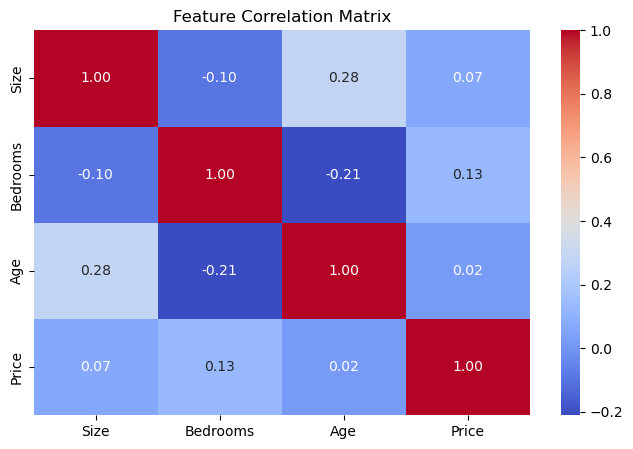

In [23]:
#compute Correlation Matrix
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [24]:
#step 3:apply Recursive Feature Elimination(Wrapper Method)
X = df.drop(columns=['Price'])  # All columns except 'Price' are features
y = df['Price']  # target variable
model = RandomForestRegressor()

# Apply RFE (Recursive Feature Elimination) to select top 2 features
rfe = RFE(model, n_features_to_select=2)
rfe.fit(X, y)

# Print the selected features using RFE
print("Selected Features using RFE:", X.columns[rfe.support_])

Selected Features using RFE: Index(['Size', 'Age'], dtype='object')


In [25]:
#Lasso Regression (Embedded Method)
# Initialize Lasso model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization parameter, you can tune this

# Fit the Lasso model
lasso.fit(X, y)

# Get the absolute values of the coefficients to determine feature importance
importance = np.abs(lasso.coef_)

# Select features that have non-zero importance
selected_features = X.columns[importance > 0]

# Display the selected features
print("Selected Features using Lasso:", selected_features)

Selected Features using Lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')
